## Introduction

> This Jupyter notebook contains all data and code necessary for __visualization__ of data for the manuscript submitted to Frontiers in Immunology titled _The Impact of Oral-Gut Inflammation in Cerebral Palsy_.

> See _./data.csv_ for raw data. Direct any questions to the [Issues](https://github.com/rjeveloff/figures-frontiers-cp/issues) page on this GitHub repository.

## Table of Contents
1. [Imports](#Imports)
2. [Style](#Style)
3. [Dataset](#Dataset)
4. [Figure 1](#Figure-1)
5. [Figure 2](#Figure-2)
6. [Figure 3](#Figure-3)
7. [Figure 4](#Figure-4)
8. [Figure 5 (R)](#Figure-5-Done-in-R-(figures.rmd))
9. [Figure 6](#Figure-6)
10. [Supplemental Figure 1](#Supplemental-Figure-1)
11. [Supplemental Figure 2](#Supplemental-Figure-2)
12. [Supplemental Figure 3](#Supplemental-Figure-3)


## Imports

In [21]:
# Preprocessing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Visualization
from matplotlib.style import use
import matplotlib.pyplot as plt
from seaborn import histplot, boxplot, lineplot, regplot
import string

# Misc.
import warnings
warnings.filterwarnings("ignore")

## Style

In [25]:
use("seaborn-paper")

DPI = 100
SAVE_FIG = False
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def get_figsize(*dims):
    return [dims[1]*6,dims[0]*5]

## Dataset

In [23]:
df = pd.read_csv("./data.csv").set_index("id")
df

,gender,group,age,cp,gmfcs,aed,ic,gb,bp,S1,S2,S3,S4,S5,QOL,IL1B,TNFA,IL6,IL8,IL10
id,,,,,,,,,,,,,,,,,,,,
1,M,2,8,tetraplegic,4,GABA+,False,2,15.6,57.5,65.0,68.5,52.4,70.0,62.68,67.13,0.00,28.90,70.35,0.52
2,M,2,4,tetraplegic,4,None,False,2,12.5,60.4,68.0,59.5,54.5,58.6,60.20,154.01,0.00,0.02,653.28,0.18
3,F,1,7,tetraplegic,5,GABA+,True,2,85.7,44.6,50.1,48.6,39.8,45.0,45.62,715.20,2.04,56.97,1652.97,0.34
4,F,1,5,tetraplegic,5,Sodium Inhibitor,True,1,23.9,51.1,48.3,39.5,38.6,60.3,47.56,277.23,0.17,86.58,394.10,0.16
5,F,2,5,hemiplegic,2,None,False,1,6.2,77.3,62.2,69.6,71.2,69.9,70.04,65.76,6.27,2.44,269.33,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,M,4,15,control,1,None,False,0,0.0,100.0,100.0,100.0,100.0,100.0,100.00,NaN,NaN,NaN,NaN,NaN
90,M,1,8,tetraplegic,5,GABA,True,1,34.5,0.0,0.0,16.0,57.0,80.0,30.60,261.84,1.44,79.59,139.64,0.45
91,F,2,12,diplegic,3,None,False,0,0.0,80.0,82.5,100.0,100.0,80.0,88.50,NaN,NaN,NaN,NaN,NaN


## Figure 1

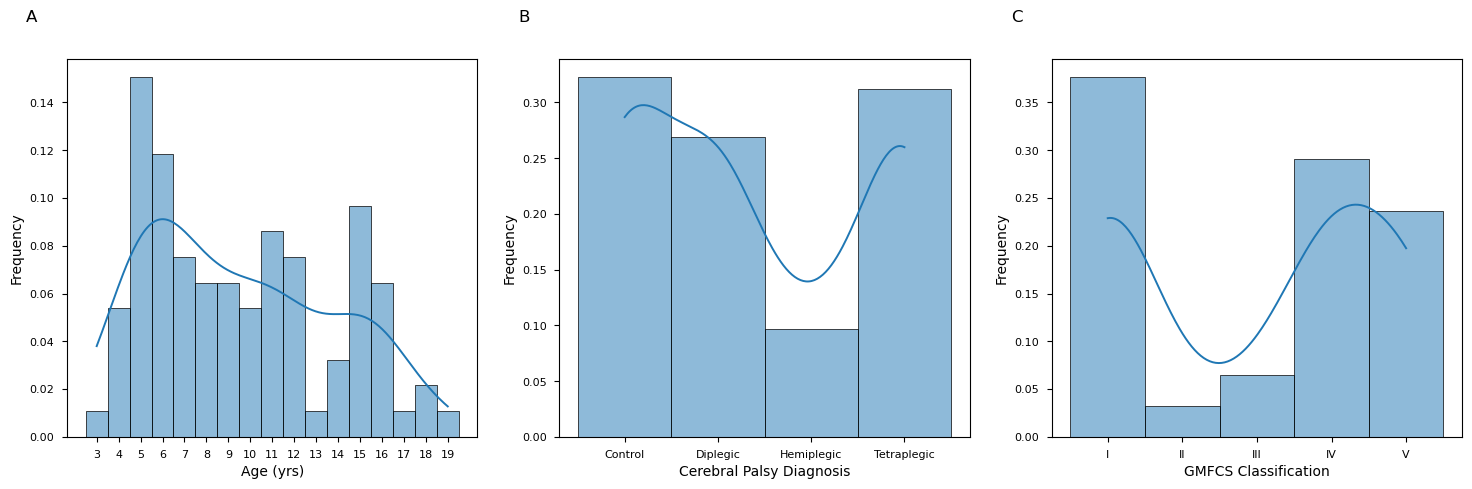

In [26]:
fig, ax = plt.subplots(1,3,figsize=get_figsize(1,3), dpi= DPI, facecolor='w', edgecolor='k')

#f1a
age_weights = np.ones_like(df.age.values)/float(len(df.age.values))
f1a = histplot(data=df,x="age",kde=True,discrete=True,bins=range(3,20),ax=ax[0],weights=age_weights,linewidth=0.5)
ax[0].set_xticks(range(3,20))
ax[0].set_xlabel("Age (yrs)")
ax[0].set_ylabel("Frequency")

#f1b
e = LabelEncoder()
e.fit(df.cp.values)
df["cp_coded"] = e.transform(df.cp.values)
cp_weights = np.ones_like(df.cp_coded.values)/float(len(df.cp_coded.values))
f1b = histplot(data=df,x="cp_coded",kde=True,discrete=True,bins=range(4),weights=cp_weights,ax=ax[1],linewidth=0.5)
ax[1].set_xticks(range(4))
ax[1].set_xticklabels([i.title() for i in e.classes_])
ax[1].set_xlabel("Cerebral Palsy Diagnosis")
ax[1].set_ylabel("Frequency")

#f1c
gmfcs_weights = np.ones_like(df.gmfcs.values)/float(len(df.gmfcs.values))
f1c = histplot(data=df,x="gmfcs",kde=True,discrete=True,bins=range(5),weights=cp_weights,ax=ax[2],linewidth=0.5)
ax[2].set_xticks(range(1,6))
ax[2].set_xticklabels(["I","II","III","IV","V"])
ax[2].set_xlabel("GMFCS Classification")
ax[2].set_ylabel("Frequency")

for i, a in enumerate(ax):
    a.text(-0.1, 1.1, string.ascii_uppercase[i], transform=a.transAxes,fontsize=BIGGER_SIZE)
    ymin, ymax = a.get_ylim()
    
if SAVE_FIG:
    plt.savefig("f1.svg")
plt.show()

## Figure 2

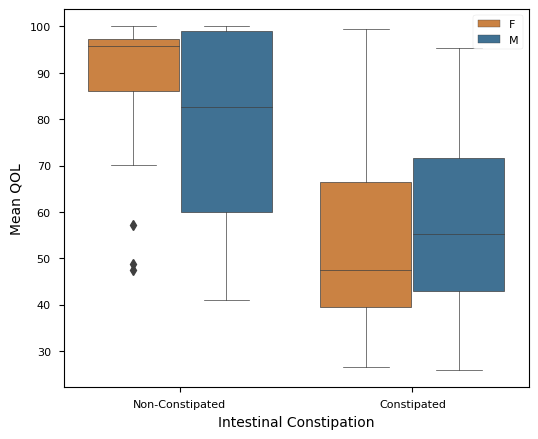

In [28]:
fig, ax = plt.subplots(figsize=get_figsize(1,1), dpi= DPI, facecolor='w', edgecolor='k')

hues = [(0.8818627450980391, 0.5053921568627451, 0.17303921568627467, 1),(0.19460784313725488, 0.45343137254901944, 0.632843137254902, 1)]

#f2
f2 = boxplot(data=df,x="ic",y="QOL",hue="gender",order=[False,True],hue_order=["F","M"],palette=hues,ax=ax,linewidth=0.5)
ax.set_xticklabels(["Non-Constipated","Constipated"])
ax.set_xlabel("Intestinal Constipation")
ax.set_ylabel("Mean QOL")
plt.legend(loc='upper right')

if SAVE_FIG:
    plt.savefig("f2.svg")
plt.show()

## Figure 3    

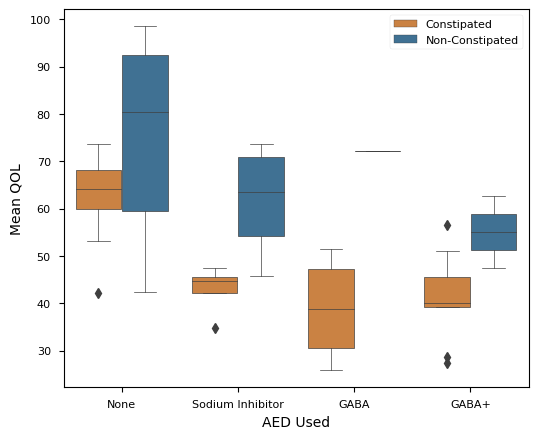

In [29]:
fig, ax = plt.subplots(figsize=get_figsize(1,1), dpi= DPI, facecolor='w', edgecolor='k')

hues = [(0.8818627450980391, 0.5053921568627451, 0.17303921568627467, 1),(0.19460784313725488, 0.45343137254901944, 0.632843137254902, 1)]

#f2
f2 = boxplot(data=df[(df.aed != "Calcium Inhibitor") & (df.cp != "control")],x="aed",y="QOL",hue="ic",order=["None","Sodium Inhibitor","GABA","GABA+"],hue_order=[True,False],palette=hues,ax=ax,linewidth=0.5)
ax.set_xlabel("AED Used")
ax.set_ylabel("Mean QOL")
plt.legend(loc='upper right')
new_labels = ['Constipated', 'Non-Constipated']
for t, l in zip(f2.legend_.texts, new_labels):
    t.set_text(l)

if SAVE_FIG:
    plt.savefig("f3.svg")
plt.show()

## Figure 4

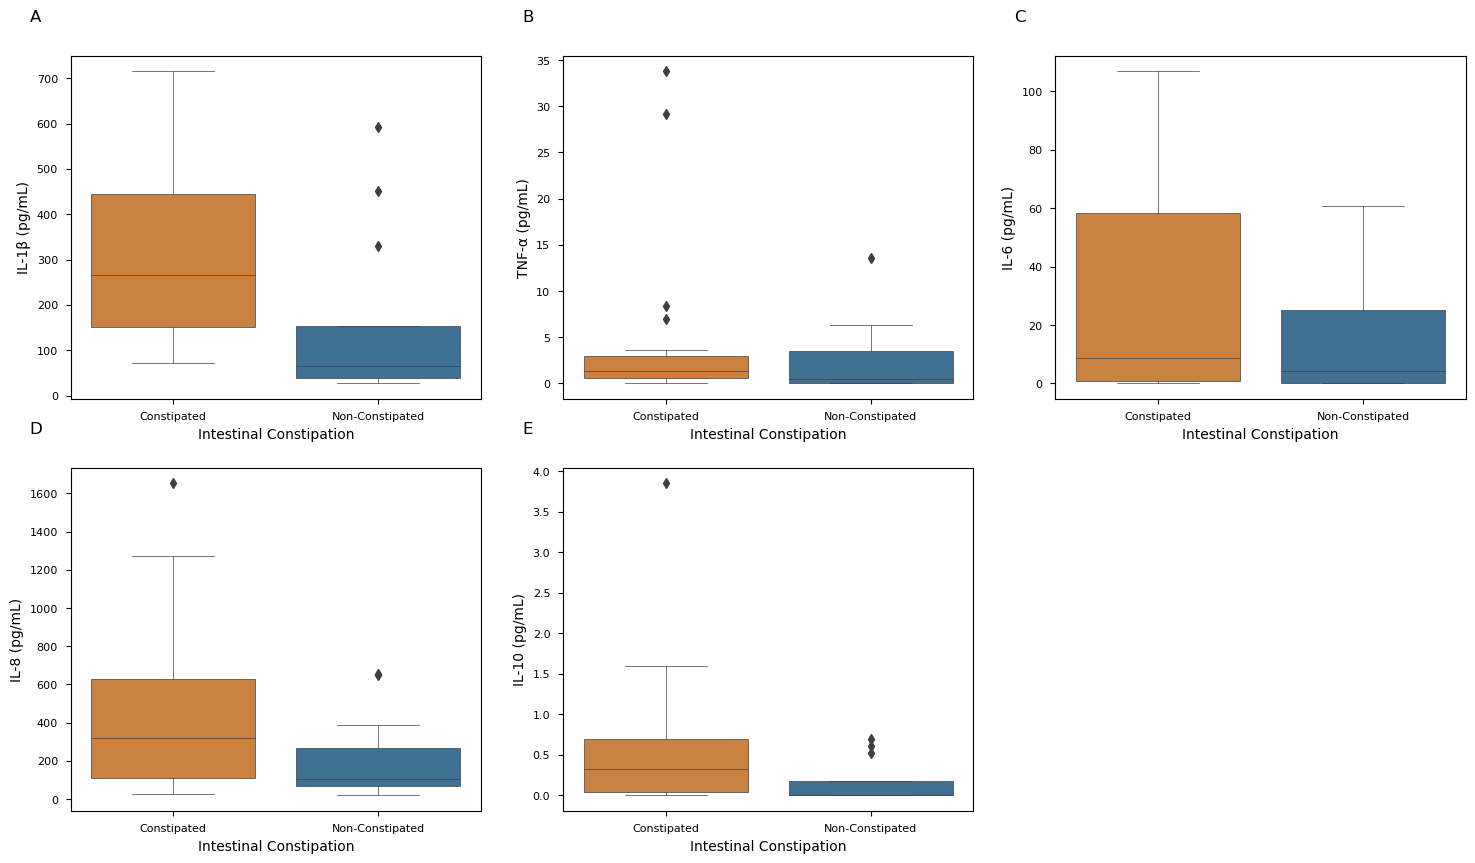

In [30]:
fig, ax = plt.subplots(2,3,figsize=get_figsize(2,3), dpi= DPI, facecolor='w', edgecolor='k')
ax.flatten()[-1].set_visible(False)
cytokines = ["IL1B","TNFA","IL6","IL8","IL10"]
labels = ["IL-1β","TNF-α","IL-6","IL-8","IL-10"]
hues = [(0.8818627450980391, 0.5053921568627451, 0.17303921568627467, 1),(0.19460784313725488, 0.45343137254901944, 0.632843137254902, 1)]
for c,l,a in zip(cytokines,labels,ax.flatten()[:-1]):
    g = boxplot(data=df,x="ic",y=c,ax=a,linewidth=0.5,order=[True,False],palette=hues)
    g.set_xlabel("Intestinal Constipation")
    g.set_xticklabels(["Constipated","Non-Constipated"])
    g.set_ylabel(f"{l} (pg/mL)")
    
for i, a in enumerate(ax.flatten()[:-1]):
    a.text(-0.1, 1.1, string.ascii_uppercase[i], transform=a.transAxes,fontsize=BIGGER_SIZE)
    
if SAVE_FIG:
    plt.savefig("f4.svg")
plt.show()

## Figure 5 Done in R (figures.rmd)

## Figure 6

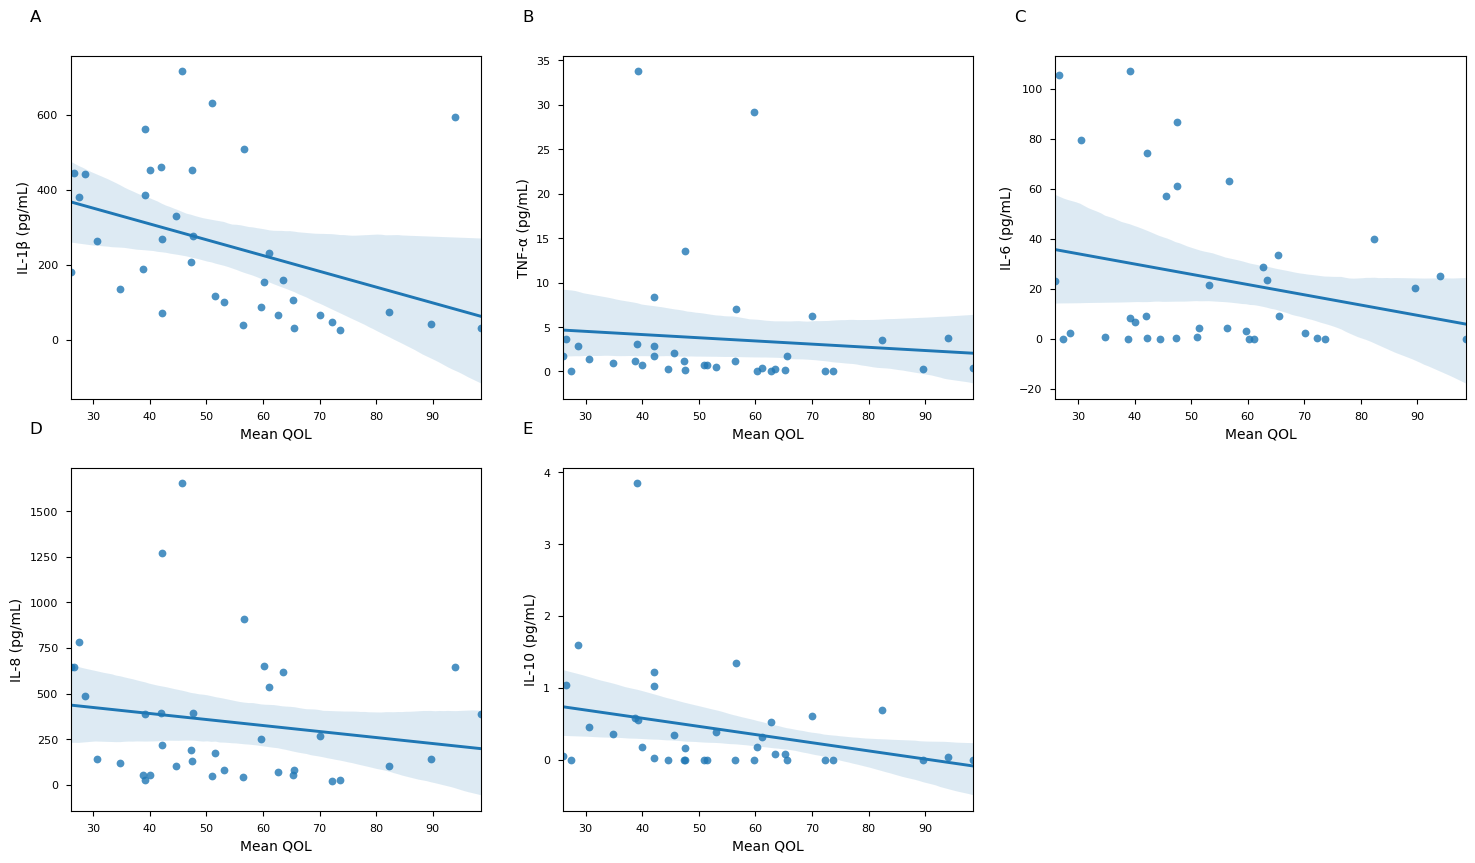

In [31]:
fig, ax = plt.subplots(2,3,figsize=get_figsize(2,3), dpi=DPI, facecolor='w', edgecolor='k')
ax.flatten()[-1].set_visible(False)
cytokines = ["IL1B","TNFA","IL6","IL8","IL10"]
labels = ["IL-1β","TNF-α","IL-6","IL-8","IL-10"]
for c,l,a in zip(cytokines,labels,ax.flatten()[:-1]):
    g = regplot(data=df,x="QOL",y=c,ax=a)
    g.set_xlabel("Mean QOL")
    g.set_ylabel(f"{l} (pg/mL)")
    
for i, a in enumerate(ax.flatten()[:-1]):
    a.text(-0.1, 1.1, string.ascii_uppercase[i], transform=a.transAxes,fontsize=BIGGER_SIZE)

if SAVE_FIG:
    plt.savefig("f6.svg")
plt.show()

## Supplemental Figure 1

_Note_: Supplemental Figure 1f was removed due to redundancy.

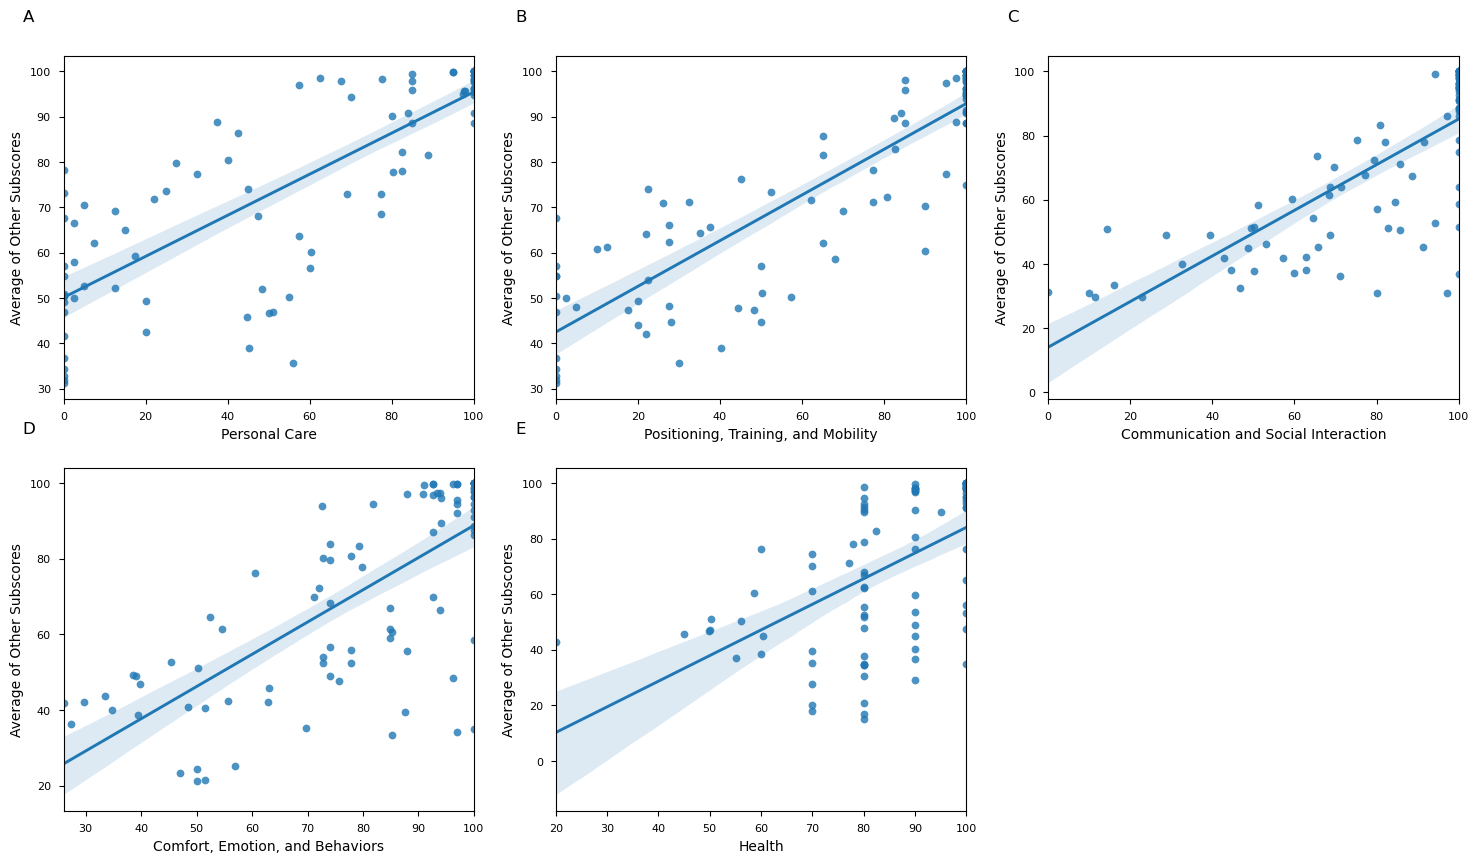

In [32]:
fig, ax = plt.subplots(2,3,figsize=get_figsize(2,3), dpi=DPI, facecolor='w', edgecolor='k')
ax.flatten()[-1].set_visible(False)

scores = ["S1","S2","S3","S4","S5","QOL"]
labels = ["Personal Care","Positioning, Training, and Mobility","Communication and Social Interaction", "Comfort, Emotion, and Behaviors", "Health", "Overall QOL"]
for s,l,a in zip(scores,labels,ax.flatten()[:-1]):
    y = np.mean(df.loc[:,[i for i in scores if i != s]],axis=1)
    g = regplot(data=df,x=s,y=y,ax=a)
    g.set_xlabel(l)
    g.set_ylabel("Average of Other Subscores")
    
for i, a in enumerate(ax.flatten()[:-1]):
    a.text(-0.1, 1.1, string.ascii_uppercase[i], transform=a.transAxes,fontsize=BIGGER_SIZE)

if SAVE_FIG:
    plt.savefig("sf1.svg")
plt.show()

## Supplemental Figure 2

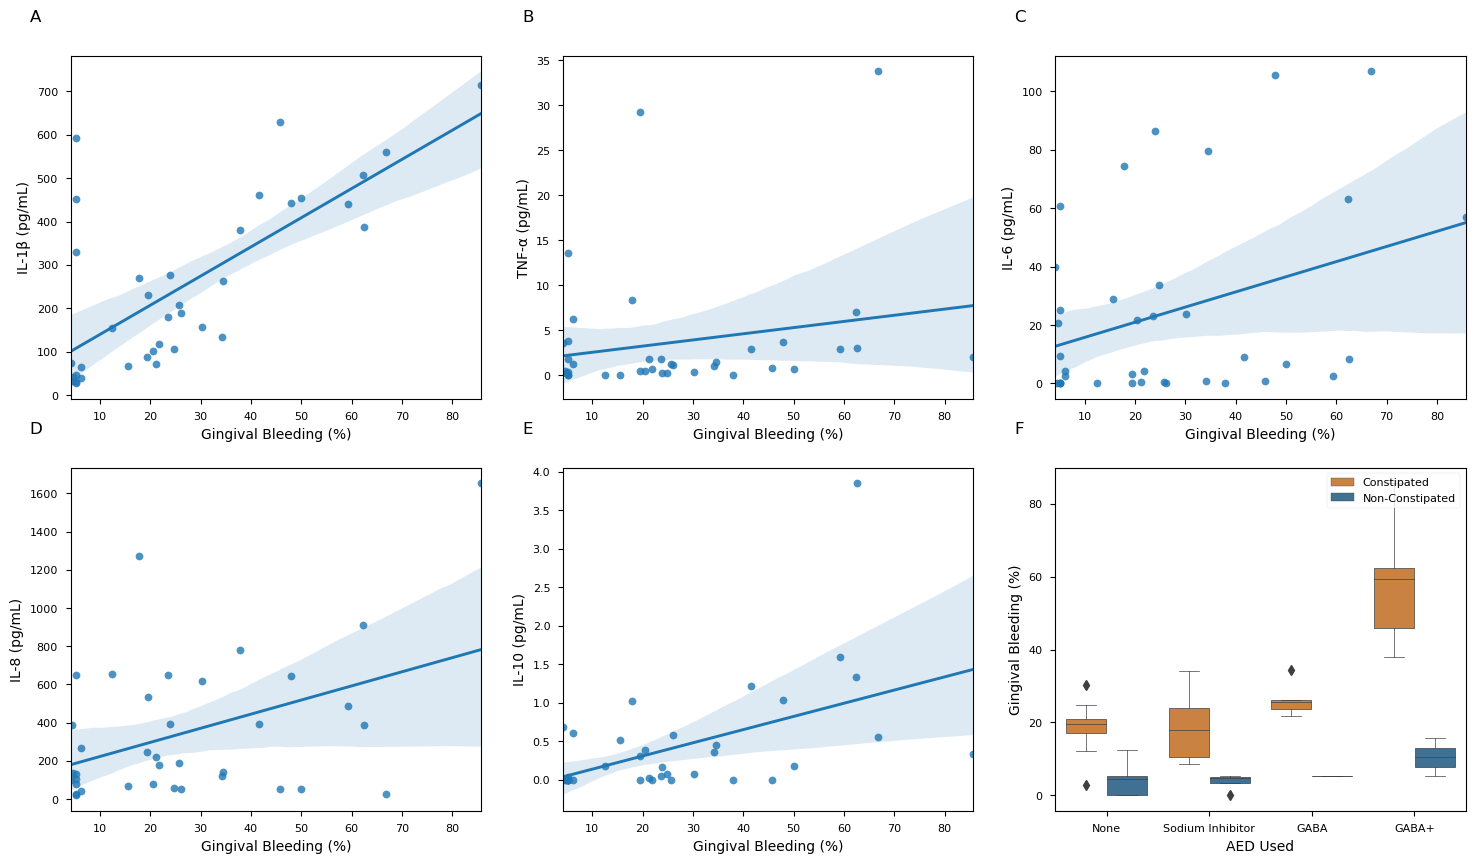

In [33]:
fig, ax = plt.subplots(2,3,figsize=get_figsize(2,3), dpi=DPI, facecolor='w', edgecolor='k')
cytokines = ["IL1B","TNFA","IL6","IL8","IL10"]
labels = ["IL-1β","TNF-α","IL-6","IL-8","IL-10"]
for c,l,a in zip(cytokines,labels,ax.flatten()[:-1]):
    g = regplot(data=df,x="bp",y=c,ax=a)
    g.set_xlabel("Gingival Bleeding (%)")
    g.set_ylabel(f"{l} (pg/mL)")
    
for i, a in enumerate(ax.flatten()):
    a.text(-0.1, 1.1, string.ascii_uppercase[i], transform=a.transAxes,fontsize=BIGGER_SIZE)

hues = [(0.8818627450980391, 0.5053921568627451, 0.17303921568627467, 1),(0.19460784313725488, 0.45343137254901944, 0.632843137254902, 1)]

#sf2f
sf2f = boxplot(data=df[(df.aed != "Calcium Inhibitor") & (df.cp != "control")],x="aed",y="bp",hue="ic",order=["None","Sodium Inhibitor","GABA","GABA+"],hue_order=[True,False],palette=hues,ax=ax.flatten()[-1],linewidth=0.5)
ax.flatten()[-1].set_xlabel("AED Used")
ax.flatten()[-1].set_ylabel("Gingival Bleeding (%)")
ax.flatten()[-1].legend(loc='upper right')
new_labels = ['Constipated', 'Non-Constipated']
for t, l in zip(sf2f.legend_.texts, new_labels):
    t.set_text(l)

if SAVE_FIG:
    plt.savefig("sf2.svg")
plt.show()

## Supplemental Figure 3

In [34]:
fig, ax = plt.subplots(1,3,figsize=get_figsize(1,3), dpi=DPI, facecolor='w', edgecolor='k')

for i, a in enumerate(ax.flatten()):
    a.text(-0.1, 1.1, string.ascii_uppercase[i], transform=a.transAxes,fontsize=BIGGER_SIZE)

hues = [(0.8818627450980391, 0.5053921568627451, 0.17303921568627467, 1),(0.19460784313725488, 0.45343137254901944, 0.632843137254902, 1)]
sf3a = boxplot(data=df,x="gender",y="bp",ax=ax[0],order=["F","M"],palette=hues,linewidth=0.5)
ax[0].set_ylabel("Gingival Bleeding (%)")
ax[0].set_xlabel("Gender")

sf3b = regplot(data=df,x="age",y="bp",ax=ax[1])
ax[1].set_ylabel("Gingival Bleeding (%)")
ax[1].set_xlabel("Age (yrs)")

sf3c = boxplot(data=df,x="cp_coded",y="bp",hue="gender",hue_order=["F","M"],palette=hues)
ax[2].set_ylabel("Gingival Bleeding (%)")
ax[2].set_xlabel("Cerebral Palsy Diagnosis")
ax[2].set_xticklabels([i.title() for i in e.classes_])
plt.legend(loc='upper right')


if SAVE_FIG:
    plt.savefig("sf3.svg")
plt.show()

SyntaxError: invalid syntax (<ipython-input-34-2b78f2b05a52>, line 1)